This code creates a plot for averaged (the last 6/10) end-to-end-distance for a certain N in dependence of N (=Number of Monomers).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
import csv

#load parameters from subfolder (each has the same content as others; exception: Number of Monomers)
import os
os.chdir('codes_with_lj_1_1_N_10')
import initial_parameters
os.chdir('..')

gamma = initial_parameters.gamma
kT = initial_parameters.kT
Kuhn_length_b = initial_parameters.Kuhn_length_b
tau_rouse_theory = initial_parameters.tau_rouse_theory

In [2]:
#set plot parameters

#change figure size
figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 9
figure_size[1] = 6
plt.rcParams['figure.figsize'] = figure_size

#set line width
plt.rcParams['lines.linewidth'] = 2

#set label size in the plots
plt.rcParams.update({'font.size': 18})

In [3]:
#create lists for quantities for graphical representation (plots)
list_of_Monomers = []
list_of_Bonds = []
list_of_sq_end_to_end_distances = []
list_of_diffusion_constants = []
list_of_rouse_times = []

averaged_quantities = open('averages_for_plot_w_lj','r')
lines = csv.reader(averaged_quantities, delimiter='	')

for line in lines:

        #time has to be multiplied by dt, otherwise it is number of timesteps
        list_of_Monomers.append(float(line[0]))
        list_of_Bonds.append(float(line[0]) - 1)
        list_of_sq_end_to_end_distances.append(float(line[1]))
                
        #to get constant, divide <(R_cm(t)-R_cm(0))^2> by 6
        list_of_diffusion_constants.append(float(line[2])/6)
        list_of_rouse_times.append(float(line[3]))

#close the file
averaged_quantities.close()

# Create the plot (sq. end-to-end distances)

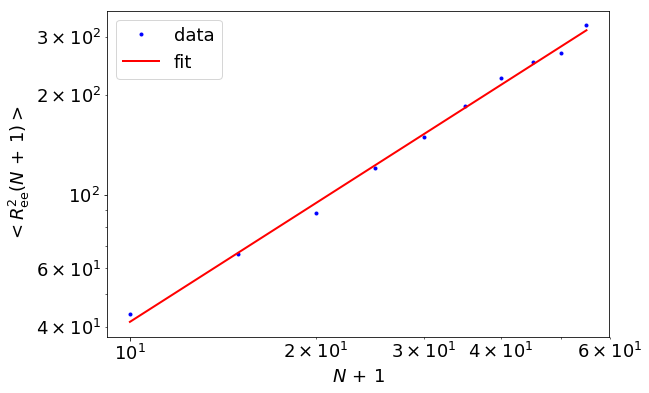

exp(parameters) = [2.6659213268096664, 1.1903676779423713] +/- [0.2235598495302886, 0.025149034231770624]


In [4]:
#covert arrays into numpy arrays and use short names (use N and y)
N = np.array(list_of_Monomers)
list_of_Bonds = np.array(list_of_Bonds)
y = np.array(list_of_sq_end_to_end_distances)

#do not use first two elements due to hard fluctuation
N_log = np.log(N)
y_log = np.log(y)

#define fit function; take independent variable as first argument
def func_sq_ee_dinstance_in_dependence_of_N(N_log, const, power):
    
    #Attention: <R_ee^2> depends on BONDS!
    return const + power*N_log

#fit the curve using function
popt, pcov = curve_fit(func_sq_ee_dinstance_in_dependence_of_N,
                       N_log, y_log)

#calculate standard deviation from estimated covariance
perr = np.sqrt(np.diag(pcov))

#define function to represent results (same as above
#but not log)
def func_show_sq_ee_dinstance_in_dependence_of_N(N, const, power):
    
    #Attention: <R_ee^2> depends on BONDS!
    return np.exp(const) * (N**power)

#plot the results, #Attention: <R_ee^2> depends on BONDS!
plt.plot(N, y, 'b.', label='data')

#skip first two values for representation
plt.plot(N, func_show_sq_ee_dinstance_in_dependence_of_N(N, *popt),
         'r-', label=('fit'))

#save the plot
plt.legend(loc='best')

plt.xscale('log')

#set ticks

plt.yscale('log')
plt.xlabel(r'$N\,+\,1$')
plt.ylabel(r'$<R_{\mathrm{ee}}^2(N\,+\,1)>$')
plt.draw()
plt.savefig('sq_distance_in_dependence_of_N.png')
plt.show()
plt.close()

#exp(const); keep power the same
parameters = [np.exp(popt[0]), (popt[1])]

#to calculate error, use Gaussian error propagation
errors = [np.absolute(popt[0]*np.exp(popt[0])*perr[0]),perr[1]]

#print parameters
print ("exp(parameters) = "+str(parameters)+" +/- "+str(errors))

# Create the plot (Diffusion constant)

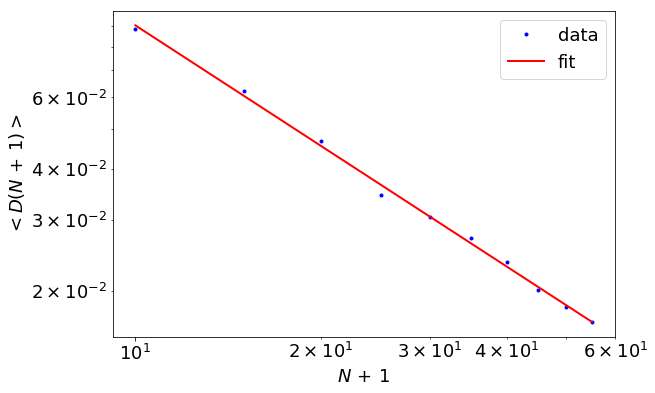

exp(parameters) = [0.8738466550909885, -0.9860822111574045] +/- [0.00752568930543056, 0.018780336878358353]


In [5]:
#covert arrays into numpy arrays and use short names (use N and y)
N = np.array(list_of_Monomers)
y = np.array(list_of_diffusion_constants)

#do not use first two elements due to hard fluctuation
N_log = np.log(N)
y_log = np.log(y)

#define fit function; take independent variable as first argument
def func_diffusion_constant_in_dependence_of_N(N_log, const, power):

    return const + power*N_log

#fit the curve using function
popt, pcov = curve_fit(func_diffusion_constant_in_dependence_of_N,
                       N_log, y_log)

#calculate standard deviation from estimated covariance
perr = np.sqrt(np.diag(pcov))

#define function to represent results (same as above
#but not log)
def func_show_diffusion_constant_in_dependence_of_N(N, const, power):

    return np.exp(const) * (N**power)

#plot the results
plt.plot(N, y, 'b.', label='data')

#skip first two values for representation
plt.plot(N, func_show_diffusion_constant_in_dependence_of_N(N, *popt),
         'r-', label=('fit'))

#save the plot
plt.legend(loc='best')

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$N\,+\,1$')
plt.ylabel(r'$< D(N\,+\,1) >$')
plt.draw()
plt.savefig('diffusion_constant_in_dependence_of_N.png')
plt.show()
plt.close()

#exp(const); keep power the same
parameters = [np.exp(popt[0]), (popt[1])]

#to calculate error, use Gaussian error propagation
errors = [np.absolute(popt[0]*np.exp(popt[0])*perr[0]),perr[1]]

#print parameters
print ("exp(parameters) = "+str(parameters)+" +/- "+str(errors))

# Create the plot (Rouse times)

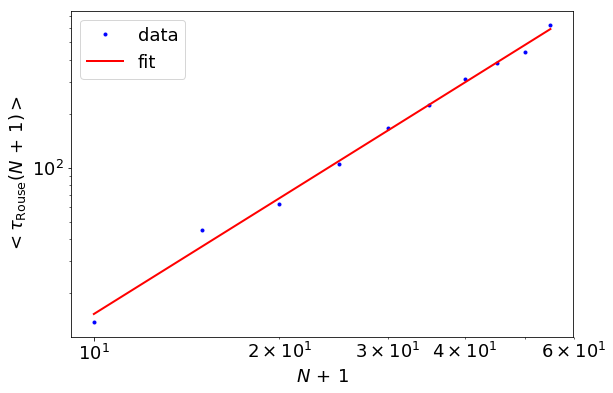

exp(parameters) = [0.10802488154055671, 2.1489988482587044] +/- [0.047037935714814655, 0.0575389664490754]


In [6]:
#covert arrays into numpy arrays and use short names (use N and y)
N = np.array(list_of_Monomers)
y = np.array(list_of_rouse_times)

#do not use first two elements due to hard fluctuation
N_log = np.log(N)
y_log = np.log(y)

#define fit function; take independent variable as first argument
def func_rouse_times_in_dependence_of_N(N_log, const, power):

    return const + power*N_log

#fit the curve using function
popt, pcov = curve_fit(func_rouse_times_in_dependence_of_N,
                       N_log, y_log)

#calculate standard deviation from estimated covariance
perr = np.sqrt(np.diag(pcov))

#define function to represent results (same as above
#but not log)
def func_show_rouse_times_in_dependence_of_N(N, const, power):
    
    return np.exp(const) * (N**power)

#plot the results
plt.plot(N, y, 'b.', label='data')

#skip first two values for representation
plt.plot(N, func_show_rouse_times_in_dependence_of_N(N, *popt),
         'r-', label=('fit'))

#save the plot
plt.legend(loc='best')

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$N\,+\,1$')
plt.ylabel(r'$< \tau_{\mathrm{Rouse}}\left(N\,+\,1\right) >$')
plt.draw()
plt.savefig('rouse_time_in_dependence_of_N.png')
plt.show()
plt.close()

#exp(const); keep power the same
parameters = [np.exp(popt[0]), (popt[1])]

#to calculate error, use Gaussian error propagation
errors = [np.absolute(popt[0]*np.exp(popt[0])*perr[0]),perr[1]]

#print parameters
print ("exp(parameters) = "+str(parameters)+" +/- "+str(errors))